In [1]:
#https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt
import math

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dense, Flatten, Activation
import time
from sklearn.metrics import r2_score
import kerastuner as kt

from collections import Counter 
import pickle
import pandas as pd
import collections
import seaborn as sns

In [3]:
Dataset1_Smiles_P = pd.read_csv("dataset1_imputed_all.csv")
Dataset1_Smiles_P

,index,Name,PID,Smiles,Details,Condition,Reference,Year,He,H2,...,log10_O2_Bayesian,log10_N2_Bayesian,log10_CO2_Bayesian,log10_CH4_Bayesian,log10_He_Etree,log10_H2_Etree,log10_O2_Etree,log10_N2_Etree,log10_CO2_Etree,log10_CH4_Etree
0,0,polyethene,P010001,*C*,Dynamic method,"25 [C] ,","Pasternak, R. A.; Schimscheimer, J. F.; Heller...",1970,NaN,NaN,...,0.531479,-0.075721,1.110590,0.012254,1.201301,1.238196,0.531479,-0.075721,1.110590,-0.103039
1,1,polyethene,P010001,*C*,Dynamic method,"25 [C] ,","Pasternak, R. A.; Schimscheimer, J. F.; Heller...",1970,NaN,NaN,...,0.429002,-0.191294,1.037426,-0.101212,0.512792,0.845879,0.372675,-0.111720,1.037426,0.361122
2,2,polyethene,P010001,*C*,"Mocon Oxtran 100 equipment; P.S. Holden, G. A....","30 [C] ,","Holden, P. S.; Orchard, G. A. J.; Ward, I. M. ...",1985,NaN,NaN,...,-0.665546,-1.367414,-0.066764,-1.348410,0.803205,0.693273,-0.665546,-1.412270,-0.130830,-1.517954
3,3,polyethene,P010001,*C*,"Mocon Oxtran 100 equipment; P.S. Holden, G. A....","30 [C] ,","Holden, P. S.; Orchard, G. A. J.; Ward, I. M. ...",1985,NaN,NaN,...,-0.327902,-1.004516,0.274628,-0.963282,0.696047,0.613919,-0.327902,-1.146430,0.327439,-1.337536
4,4,polyethene,P010001,*C*,NaN,"25 [C] ,","Holden, P. S.; Orchard, G. A. J.; Ward, I. M. ...",1985,1.77,NaN,...,-0.013228,-0.490133,0.826281,-0.003425,0.247973,0.794222,-0.013228,-0.606161,0.774200,-0.306994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,313,Poly(2-adamanthyl vinyl ether),NaN,C(C(OC1C3CC2CC1CC(C2)C3)*)*,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,NaN,...,0.778874,0.227887,1.401401,0.360861,1.035338,1.350877,0.778874,0.227887,1.401401,0.498163
774,314,Poly(benzyl vinyl ether),NaN,C(C(OCC1=CC=CC=C1)*)*,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,NaN,...,0.367356,-0.102373,1.045323,0.067094,0.506273,0.849116,0.367356,-0.102373,1.045323,0.359446
775,315,Poly(cyclohexylmethyl vinyl ether),NaN,C(C(OCC1CCCCC1)*)*,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,NaN,...,0.190332,-0.397940,0.770115,-0.314109,0.966260,0.943327,0.190332,-0.397940,0.770115,-0.114003
776,316,Poly(8-tricyclo[5.2.1.0]decylmethyl vinyl ether),NaN,C(C(OCC1CC2C3C(C1C2)CCC3)*)*,Vinyl and Vinylidene Polymers,NaN,http://dx.doi.org/10.1002/app.30834,2009,NaN,NaN,...,-0.091515,-0.886057,0.454845,-0.901289,0.922455,1.046136,-0.091515,-0.886057,0.454845,-1.037802


In [7]:
#dataset-1 fingerprint
molecules = Dataset1_Smiles_P.Smiles.apply(Chem.MolFromSmiles)
#canonical_smiles = molecules.apply(Chem.MolToSmiles, canonical=True)
#Dataset1_Smiles_P['Smiles'] = canonical_smiles
#Dataset1_Smiles_P.to_csv('dataset1_imputed_all.csv')
fp = molecules.apply(lambda m: AllChem.GetMorganFingerprint(m, radius=3))
fp_n = fp.apply(lambda m: m.GetNonzeroElements())

In [18]:
#molecules = Dataset1_Smiles_P.Smiles.apply(Chem.MolFromSmiles)
#for i in range(Dataset1_Smiles_P.shape[0]):
#    molecule = molecules[i]
#    fp = AllChem.GetMorganFingerprint(molecule, radius=3)
#    print(i)

In [6]:
fp_n #series with a dictionary in each position, each molecule is a dictionary?

0      {915669106: 1, 1302073591: 2, 2245384272: 1, 2...
1      {915669106: 1, 1302073591: 2, 2245384272: 1, 2...
2      {915669106: 1, 1302073591: 2, 2245384272: 1, 2...
3      {915669106: 1, 1302073591: 2, 2245384272: 1, 2...
4      {915669106: 1, 1302073591: 2, 2245384272: 1, 2...
                             ...                        
773    {50791541: 1, 199163361: 1, 517457164: 5, 8646...
774    {98513984: 3, 100524170: 1, 348315680: 1, 7420...
775    {111924587: 1, 171200514: 1, 864674487: 1, 967...
776    {52609962: 1, 318665910: 1, 481936324: 1, 4830...
777    {864674487: 1, 1302073591: 1, 1307459754: 1, 1...
Name: Smiles, Length: 778, dtype: object

In [7]:
#dataset-2 no Tg
ID_noP_pred = pd.read_csv("Dataset2_Smiles.csv")
ID_noP_pred

,Smiles,ID
0,*C(C*)CCC(C)C,P010010.mol
1,*C(C*)CCC(CC)C,P010011.mol
2,*C(C*)C1CC1,P010021.mol
3,*C(C*)C1CCC1,P010022.mol
4,*C(C*)C(c1ccccc1)C,P010029.mol
...,...,...
5686,*c1c2ccccc2c2ccccc2c1*,P522051.mol
5687,*c1c2ccc3ccc(c4ccc(c(c1)C#C)c2c34)*,P522052.mol
5688,*c1c2ccc3ccc(c4ccc(c(c1)C#CC=C)c2c34)*,P522053.mol
5689,*c1c2ccc3ccc(c4ccc(c(c1)C#CC#C[Si](C)(C)C)c2c34)*,P522054.mol


In [8]:
#dataset-2 fingerprint
molecules_noP_pred = ID_noP_pred.Smiles.apply(Chem.MolFromSmiles)

fp_noP_pred = molecules_noP_pred.apply(lambda m: AllChem.GetMorganFingerprint(m, radius=3))
fp_noP_pred_n = fp_noP_pred.apply(lambda m: m.GetNonzeroElements())

In [9]:
# using substructures in dataset-1 to construct a dictionary
# what is happening here and what is hash code?
HashCode = []
for i in fp_n:
    for j in i.keys():
        HashCode.append(j) #creates a list of all of the substructures encountered
        
unique_set = set(HashCode) #finds the unique hashes that correpond to substructures
unique_list = list(unique_set)

Corr_df = pd.DataFrame(unique_list).reset_index() #put together all of the unique values into a reordered dataframe

In [10]:
Corr_df[0]

0        966434816
1       3870277633
2        900325378
3        254107648
4       3925172229
           ...    
3211     351010789
3212    4038508520
3213    1757216757
3214    3533643770
3215    1519484925
Name: 0, Length: 3216, dtype: int64

In [11]:
#construct dataset-1 input
MY_finger = []

#loop through each of the dictionaries (each fingerprint)
for polymer in fp_n: #each polymer is a dictionary
    my_finger = [0] * len(unique_list) #set the correct length of the fingerprint
    for key in polymer.keys(): #loop through the list of keys for the polymer dictionary
        index = Corr_df[Corr_df[0] == key]['index'].values[0] #get the indices that correspond to nonzero values in the fingerprint
        my_finger[index] = polymer[key] #fingerprint is a vector of mostly zeros with some 1s and other values
    MY_finger.append(my_finger)
    
MY_finger_dataset_1 = pd.DataFrame(MY_finger) #convert to matrix of fingerprints to a dataframe
#each row is a polymer and each column is a substructure

In [12]:
MY_finger_dataset_1

,0,1,2,3,4,5,6,7,8,9,...,3206,3207,3208,3209,3210,3211,3212,3213,3214,3215
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#construct dataset-2 input
MY_finger = []
for polymer in fp_noP_pred_n:
    my_finger = [0] * len(unique_list)
    for key in polymer.keys():
        if key in list(Corr_df[0]):
            index = Corr_df[Corr_df[0] == key]['index'].values[0]
            my_finger[index] = polymer[key]
    MY_finger.append(my_finger)

MY_finger_dataset_2 = pd.DataFrame(MY_finger)

In [14]:
# filter input into the most popular 124 substructures
Zero_Sum = (MY_finger_dataset_1 == 0).astype(int).sum() #sum the number of zeros in each column
NumberOfZero = 6400
print(len(Zero_Sum[Zero_Sum < NumberOfZero])) #find the number of substructures that have fewer zeros than the threshold

#only use the 124 substructures that are most popular to reduce the dimensionality
X_dataset_1 = MY_finger_dataset_1[Zero_Sum[Zero_Sum < NumberOfZero].index]
X_dataset_2 = MY_finger_dataset_2[Zero_Sum[Zero_Sum < NumberOfZero].index]

3216


### DNN

In [15]:
X = X_dataset_1
y = Dataset1_Smiles_P['log10_CH4_Etree']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=2)

In [16]:
#neural network with two hidden layers and 8 nodes in each layer
model = keras.models.Sequential()
model.add(Dense(units = 8, input_dim = X.shape[1],activation='relu'))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 1))

# model.summary()
#no dropout layers?
model.compile(loss = 'mean_squared_error',
    optimizer = 'adam')
history = model.fit((X_train), y_train, epochs = 100, batch_size = 64,
    validation_data = ((X_test), y_test), verbose=2)

Epoch 1/100
10/10 - 1s - loss: 3.0235 - val_loss: 3.0741
Epoch 2/100
10/10 - 0s - loss: 2.4583 - val_loss: 2.5905
Epoch 3/100
10/10 - 0s - loss: 2.0236 - val_loss: 2.1443
Epoch 4/100
10/10 - 0s - loss: 1.6844 - val_loss: 1.7971
Epoch 5/100
10/10 - 0s - loss: 1.4094 - val_loss: 1.5783
Epoch 6/100
10/10 - 0s - loss: 1.2146 - val_loss: 1.3796
Epoch 7/100
10/10 - 0s - loss: 1.0561 - val_loss: 1.2374
Epoch 8/100
10/10 - 0s - loss: 0.9320 - val_loss: 1.1114
Epoch 9/100
10/10 - 0s - loss: 0.8285 - val_loss: 1.0507
Epoch 10/100
10/10 - 0s - loss: 0.7559 - val_loss: 1.0006
Epoch 11/100
10/10 - 0s - loss: 0.6902 - val_loss: 0.9492
Epoch 12/100
10/10 - 0s - loss: 0.6416 - val_loss: 0.9270
Epoch 13/100
10/10 - 0s - loss: 0.6046 - val_loss: 0.8940
Epoch 14/100
10/10 - 0s - loss: 0.5631 - val_loss: 0.8650
Epoch 15/100
10/10 - 0s - loss: 0.5355 - val_loss: 0.8612
Epoch 16/100
10/10 - 0s - loss: 0.5116 - val_loss: 0.8547
Epoch 17/100
10/10 - 0s - loss: 0.4890 - val_loss: 0.8305
Epoch 18/100
10/10 - 0s

Train set R^2:  0.8955586182468709
Train MAE score: 0.3343
Test set R^2:  0.728062874712033
Test MAE score: 0.6286


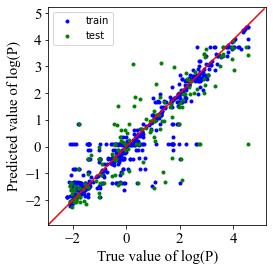

In [17]:
#calcualate performance on the training data
y_pred_train = model.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
print("Train MAE score: %.4f" % mean_absolute_error(y_train, y_pred_train))

#calculate performance on the test data
y_pred_test = model.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))
print("Test MAE score: %.4f" % mean_absolute_error(y_test, y_pred_test))

#plot the actual y against the predicted y
ax=plt.subplot(1, 1, 1)
plt.plot(y_train, y_pred_train, 'b.')  #training in blue
plt.plot(y_test, y_pred_test, 'g.') #test in green
plt.legend(['train','test'])
 
#graph aethetics
plt.xlabel("True value of log(P)",fontname="Times New Roman", fontsize=15)
plt.ylabel("Predicted value of log(P)",fontname="Times New Roman", fontsize=15)
x0, x1 = min(y_train), max(y_train)
length = x1 - x0
x_start, x_end = x0-0.1*length, x1+0.1*length
plt.xlim([x_start, x_end])
plt.ylim([x_start, x_end])
#ax.set_xticks([-200,-100,0,100,200,300,400,500])
#ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=15)
plt.yticks(fontname="Times New Roman", fontsize=15)
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, 0.01*length),
np.arange(x_start, x_end, 0.01*length), 'r-')